In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [4]:
## loading yolo models
net=cv2.dnn.readNetFromDarknet('yolov2.cfg','yolov3-spp.weights')

In [5]:
classes=[]
with open('coco.names','r') as f :
    classes=[line.strip() for line in f.readlines()]

In [6]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [9]:
my_img = cv2.imread("C:/Users/MRADMIN.DESKTOP-MBC3FI6/Desktop/images yolo/im 1.jpg")
my_img = cv2.resize(my_img,(1280,720))


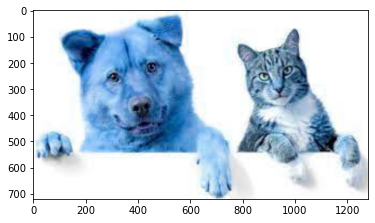

In [10]:
plt.imshow(my_img)


In [25]:
new_img=cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB)

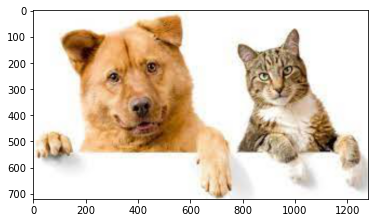

In [26]:
plt.imshow(new_img)

In [27]:
ht, wt , _ = new_img.shape

In [28]:
blob=cv2.dnn.blobFromImage(new_img,1/255,(416,416),(0,0,0),swapRB=True,crop=False)

In [29]:
blob


array([[[[1.       , 1.       , 1.       , ..., 1.       , 1.       ,
          1.       ],
         [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
          1.       ],
         [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
          1.       ],
         ...,
         [0.9960785, 0.9960785, 0.9960785, ..., 0.9960785, 0.9960785,
          0.9960785],
         [0.9960785, 0.9960785, 0.9960785, ..., 0.9960785, 0.9960785,
          0.9960785],
         [0.9960785, 0.9960785, 0.9960785, ..., 0.9960785, 0.9960785,
          0.9960785]],

        [[1.       , 1.       , 1.       , ..., 1.       , 1.       ,
          1.       ],
         [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
          1.       ],
         [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
          1.       ],
         ...,
         [0.9960785, 0.9960785, 0.9960785, ..., 0.9960785, 0.9960785,
          0.9960785],
         [0.9960785, 0.9960785, 0.9960785, ..., 0.

In [30]:
blob.shape


(1, 3, 416, 416)

In [35]:
net.setInput(blob)

In [45]:
last_layer = net.getUnconnectedOutLayersNames()

In [46]:
layer_out = net.forward(last_layer)

In [51]:
layer_out[0].shape


(845, 85)

In [48]:
layer_out

[array([[nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]], dtype=float32)]

In [41]:
boxes=[]
confidences =[]
class_ids=[]

for output in layer_out:
    for detection in output:
        score=detection[5:]
        class_id =np.argmax(score)
        confidence = score[class_id]
        if confidence > .6:
            center_x = int(detection[0] * wt)
            center_y = int(detection[1] * ht)
            w = int(detection[2]*wt)
            h = int(detction[3]*ht)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)
            
        

In [42]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)
font = cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [43]:
if len(indexes) >0 :
    for i in indexes.flatten():
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = str(round(confidence[i],2))
        color = colors[i]
        cv2.rectangle(new_img,(x,y),(x+w,y+h),color,2)
        cv2.putText(new_img,label+" "+confidence,(x,y+20),font,2,(255,255,255),2)

    cv2.imshow('img',new_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()